Nama: : Jessica Theresia<br>
Email: : me.jessicatheresia@gmail.com<br>
ID Dicoding: : jessica_trs<br>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Ketentuan Dataset**:
   - Dataset "bank_transactions_data_2.csv"
   - Jumlah Data: 2,512 baris (memenuhi syarat minimal 1000 baris)
   - Jumlah Fitur: 16 kolom (terdiri dari numerikal & kategorikal)
   - Jenis Data:
    * Numerik: TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance
    * Kategorikal: TransactionType, Location, CustomerOccupation, Channel, dll.

Repository : https://github.com/Jejetrs/Dicoding-DBS-Camp---ML-Pemula-Module..git

# **2. Import Library**

Pada tahap ini, perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from scipy.stats import zscore
from scipy.stats import skew
import plotly.express as px
import plotly.graph_objects as go

# **3. Memuat Dataset**

Pada tahap ini untuk memuat dataset yang memiliki format CSV serta memastikan direktorinya benar, menghubungkan Google Drive ke Colab terlebih dahulu.

In [ ]:
# Memuat dataset dari Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memuat dataset dengan path yang benar
df = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_clustering.csv")

# Menampilkan beberapa baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
# Missing value
missing_values = df.isnull().sum()

print("Jumlah missing value per kolom:")
print(missing_values)

total_missing = missing_values.sum()
print(f"\nTotal missing values dalam dataset: {total_missing}")

Jumlah missing value per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Total missing values dalam dataset: 0


In [ ]:
# data duplikat
num_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 0


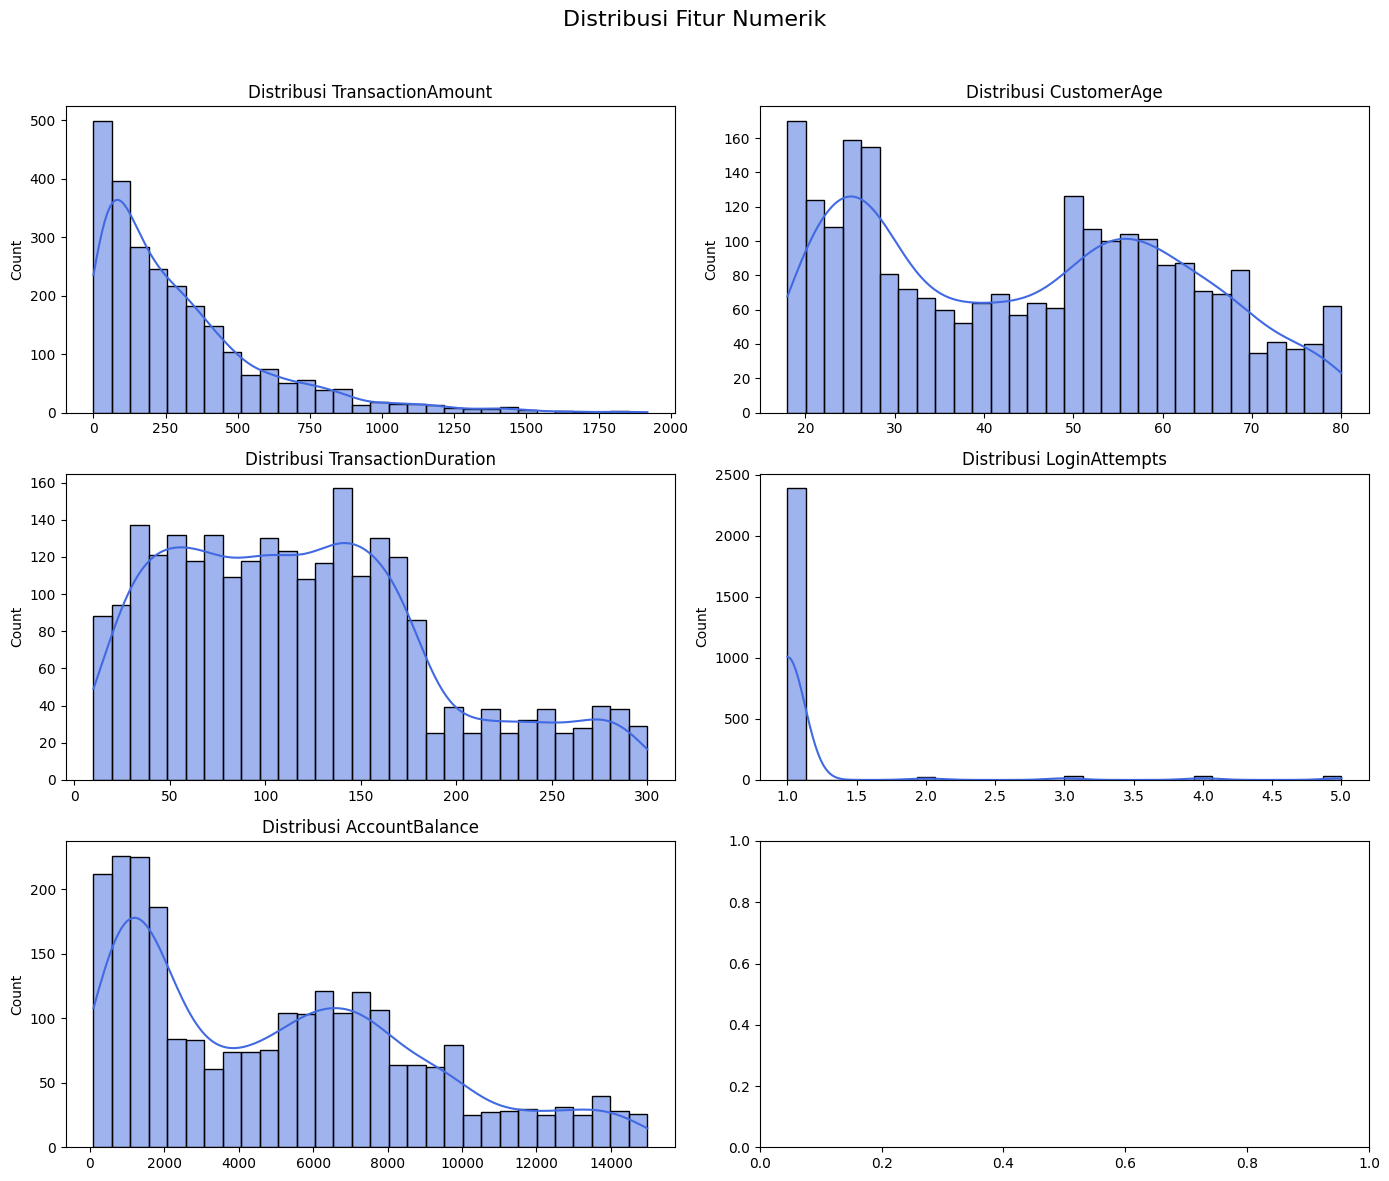

In [ ]:
# Visualisasi distribusi fitur numerik
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribusi Fitur Numerik", fontsize=16)

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Identifikasi fitur numeric
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Hitung jumlah kategori unik dalam setiap fitur
unique_values = {col: df[col].nunique() for col in numerical_features}
unique_values

{'TransactionAmount': 2455,
 'CustomerAge': 63,
 'TransactionDuration': 288,
 'LoginAttempts': 5,
 'AccountBalance': 2510}

In [ ]:
# Identifikasi fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.to_list()

# Hitung jumlah kategori unik dalam setiap fitur
unique_values = {col: df[col].nunique() for col in categorical_features}
unique_values

{'TransactionID': 2512,
 'AccountID': 495,
 'TransactionDate': 2512,
 'TransactionType': 2,
 'Location': 43,
 'DeviceID': 681,
 'IP Address': 592,
 'MerchantID': 100,
 'Channel': 3,
 'CustomerOccupation': 4,
 'PreviousTransactionDate': 360}

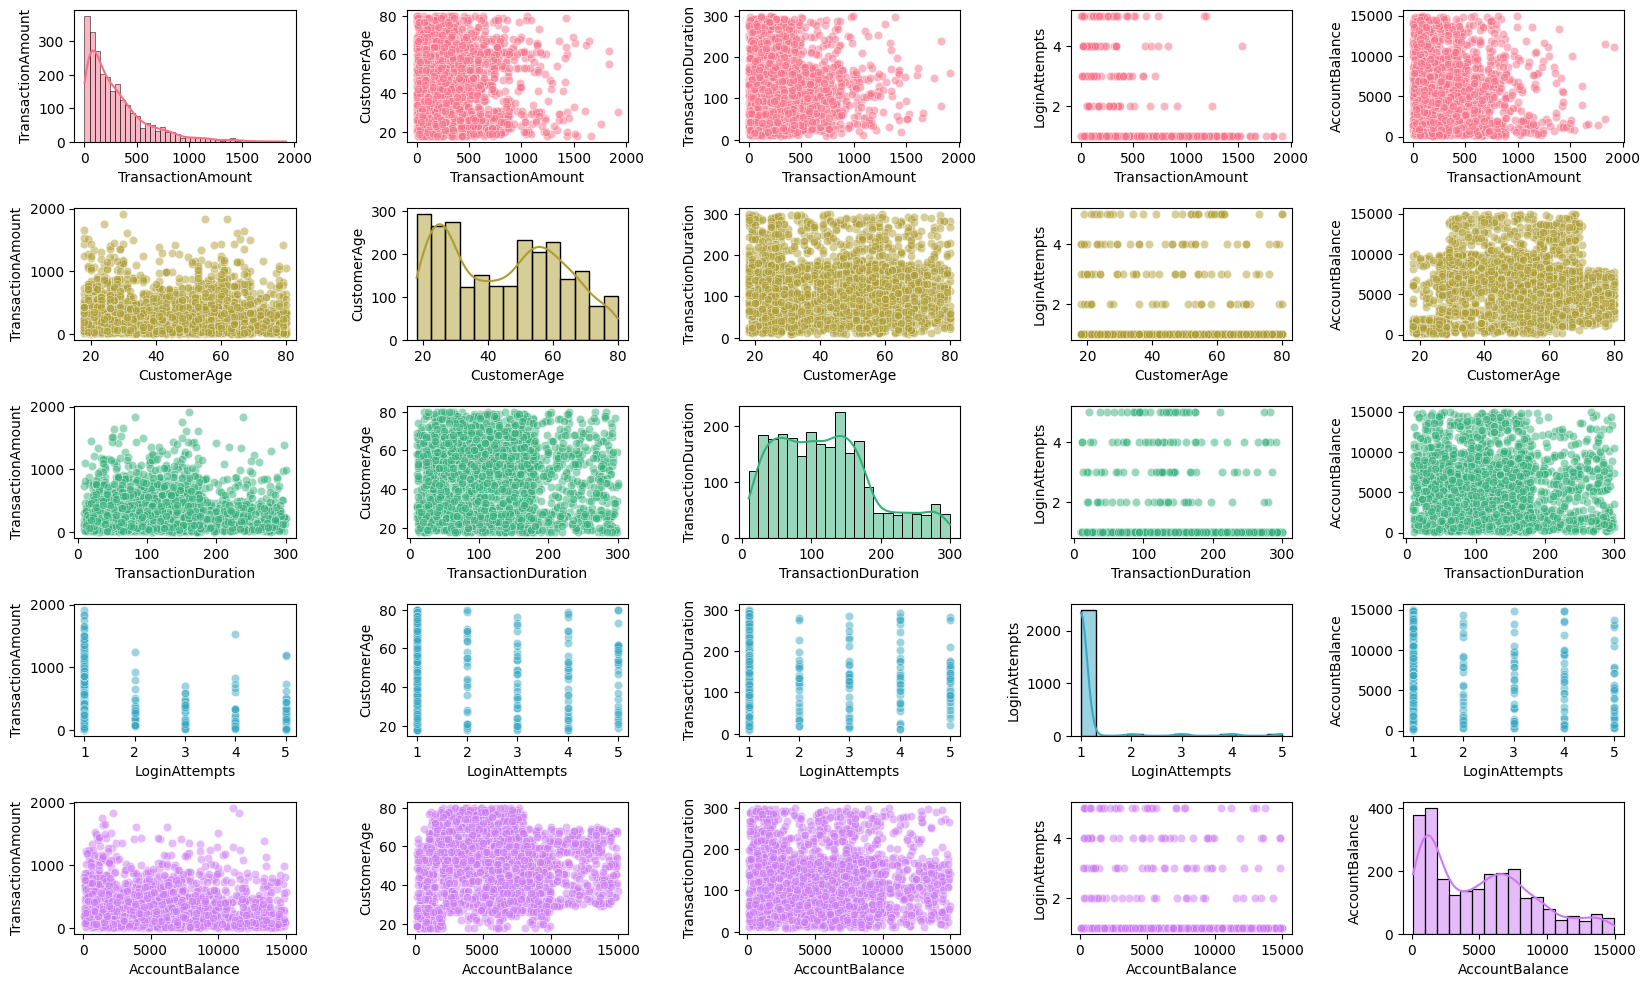

In [ ]:
# Pairplot (scatterplot matrix) yang menunjukkan hubungan antar variabel numerik
plt.figure(figsize=(20, 12))

colors = sns.color_palette("husl", len(numerical_features))

n = 0
for i, x in enumerate(numerical_features):
    for j, y in enumerate(numerical_features):
        n += 1
        plt.subplot(len(numerical_features), len(numerical_features), n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

        # Scatterplot hanya untuk pasangan unik
        if i != j:
            sns.scatterplot(x=df[x], y=df[y], alpha=0.5, color=colors[i])
        else:
            sns.histplot(df[x], kde=True, color=colors[i])  # Histogram untuk variabel terhadap dirinya sendiri

        plt.xlabel(x, fontsize=10)
        plt.ylabel(y, fontsize=10)

plt.show()

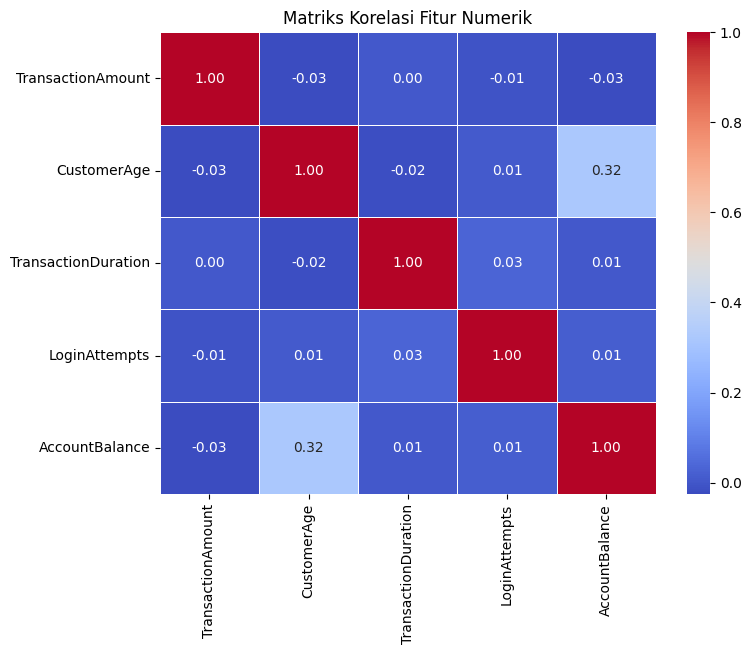

In [ ]:
# Korelasi antara fitur numerik
corr_matrix = df[numerical_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang saya lakukan :
1. Transformasi Quantile untuk TransactionAmount dan Boxcox untuk LoginAttempts
  * Menggunakan Quantile Transformer untuk mengubah distribusi menjadi normal.
  * Visualisasi histogram sebelum & sesudah transformasi untuk melihat perbedaan distribusi.
  * Menggunakan Tranformasi Boxcox untuk mengatasi nilai skew yang besar untuk mencapai nilai normal.

2. Penghapusan Kolom yang Tidak Relevan
  * Menghapus kolom seperti TransactionID, AccountID, TransactionDate, dll., karena tidak relevan untuk analisis.

3. Encoding Variabel Kategorikal
  * Menggunakan Label Encoding untuk mengubah variabel kategorikal (TransactionType, Location, dll.) menjadi bentuk numerik.

4. Normalisasi Data Numerik
  * StandardScaler digunakan untuk menstandarisasi fitur numerik (TransactionAmount, CustomerAge, dll.).
  * Log Transform (log1p) diterapkan ke LoginAttempts untuk mengatasi skewness.

5. Visualisasi Korelasi Fitur
  * Heatmap korelasi dibuat untuk melihat hubungan antar fitur numerik setelah preprocessing.

In [ ]:
# Deteksi Outlier dengan Z-Score
df_outlier = df.copy()
z_scores = np.abs(zscore(df_outlier.select_dtypes(include=['number'])))
outliers_z = (z_scores > 3).sum(axis=0)

print("\nJumlah Outlier per Kolom (Z-Score > 3):")
print(outliers_z)


Jumlah Outlier per Kolom (Z-Score > 3):
TransactionAmount      48
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
AccountBalance          0
dtype: int64


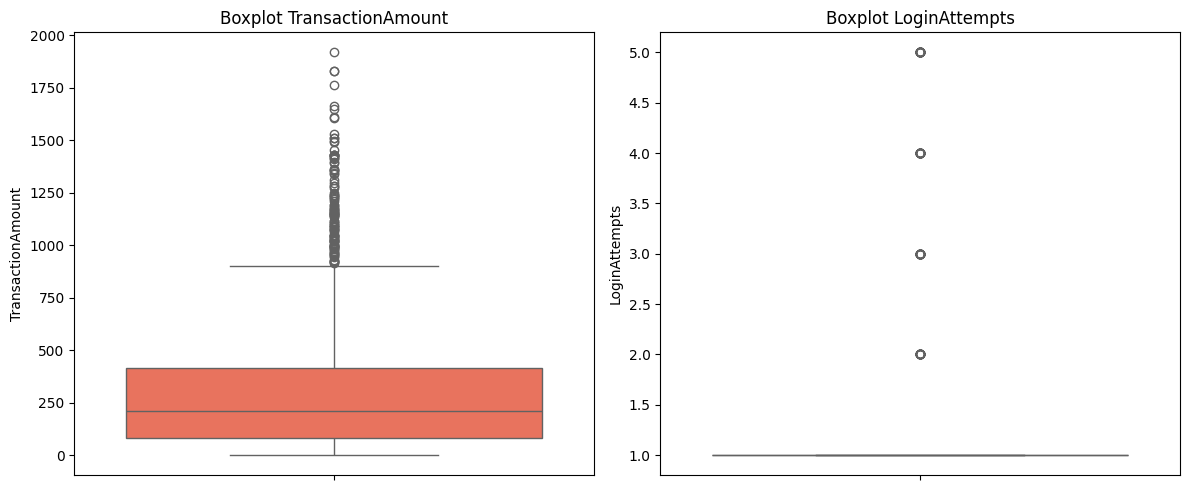

In [ ]:
# Visualisasi outlier
outlier_features = ["TransactionAmount", "LoginAttempts"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(outlier_features):
    sns.boxplot(y=df[col], ax=axes[i], color='tomato')
    axes[i].set_title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Menghapus kolom yang tidak relevan termasuk LoginAttempts
columns_to_drop = ['TransactionDate', 'PreviousTransactionDate', 'IP Address','TransactionID', 'AccountID',"DeviceID", "MerchantID", 'LoginAttempts','Location']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print("Tipe data tiap kolom yang digunakan sebelum encoding:\n", df.dtypes)

Tipe data tiap kolom yang digunakan sebelum encoding:
 TransactionAmount      float64
TransactionType         object
Channel                 object
CustomerAge              int64
CustomerOccupation      object
TransactionDuration      int64
AccountBalance         float64
dtype: object


In [ ]:
def remove_outliers(df, columns=['TransactionAmount']):
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df)

In [ ]:
# Deteksi Outlier terhadap feature numerik yang digunakan untuk clustering
df_outlier = df.copy()
z_scores = np.abs(zscore(df_outlier.select_dtypes(include=['number'])))
outliers_z = (z_scores > 3).sum(axis=0)

print("\nJumlah Outlier per Kolom (Z-Score > 3):")
print(outliers_z)


Jumlah Outlier per Kolom (Z-Score > 3):
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
AccountBalance         0
dtype: int64


In [ ]:
# Encode kolom kategorikal
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df[categorical_columns])

categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(), index=df.index)

df = pd.concat([df.drop(columns=categorical_columns), categorical_df], axis=1)

print("Dataset setelah preprocessing:")
print(df.head())

Dataset setelah preprocessing:
   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              14.09           70                   81         5112.21   
1             376.24           68                  141        13758.91   
2             126.29           19                   56         1122.35   
3             184.50           26                   25         8569.06   
4              13.45           26                  198         7429.40   

   TransactionType_Credit  TransactionType_Debit  Channel_ATM  Channel_Branch  \
0                     0.0                    1.0          1.0             0.0   
1                     0.0                    1.0          1.0             0.0   
2                     0.0                    1.0          0.0             0.0   
3                     0.0                    1.0          0.0             0.0   
4                     1.0                    0.0          0.0             0.0   

   Channel_Online  CustomerOccupation

In [ ]:
# Mengonversi nilai True/False menjadi 1/0
boolean_columns = df.select_dtypes(include=["bool"]).columns
df[boolean_columns] = df[boolean_columns].astype(int)

print("Kolom setelah konversi True/False ke numerik:\n", df.dtypes)

Kolom setelah konversi True/False ke numerik:
 TransactionAmount              float64
CustomerAge                      int64
TransactionDuration              int64
AccountBalance                 float64
TransactionType_Credit         float64
TransactionType_Debit          float64
Channel_ATM                    float64
Channel_Branch                 float64
Channel_Online                 float64
CustomerOccupation_Doctor      float64
CustomerOccupation_Engineer    float64
CustomerOccupation_Retired     float64
CustomerOccupation_Student     float64
dtype: object


In [ ]:
# Normalisasi data numeric
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Dataset setelah preprocessing
print("Dataset setelah preprocessing:")

df.head()

Dataset setelah preprocessing:


,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.015317,0.838710,0.244828,0.336832,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.416400,0.806452,0.451724,0.918055,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.139579,0.016129,0.158621,0.068637,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.204047,0.129032,0.051724,0.569198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.014608,0.129032,0.648276,0.492591,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


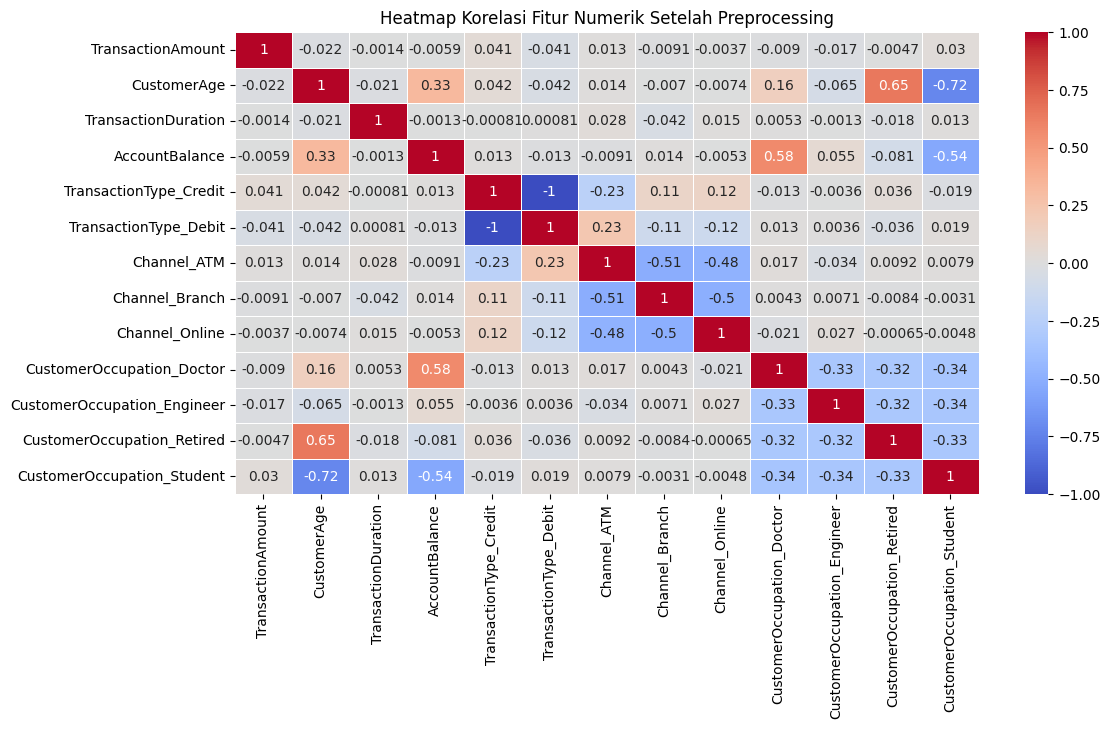

In [ ]:
# Heatmap korelasi setelah preprosesing
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Numerik Setelah Preprocessing")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan kemudian melatih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Model dengan algoritma KMeans
kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=20)
labels_temp = kmeans_temp.fit_predict(df)

## **b. Evaluasi Model Clustering**

Evaluasi KMeans Clustering dengan Elbow Method & Silhouette Score
Kode ini bertujuan untuk menentukan jumlah cluster optimal dengan dua metode evaluasi:

1. Elbow Method
* Tujuan: Menganalisis inertia (jumlah total jarak titik ke centroid) untuk menentukan jumlah cluster optimal.

2. Silhouette Score
* Tujuan: Mengevaluasi seberapa baik setiap titik data berada dalam cluster yang benar.

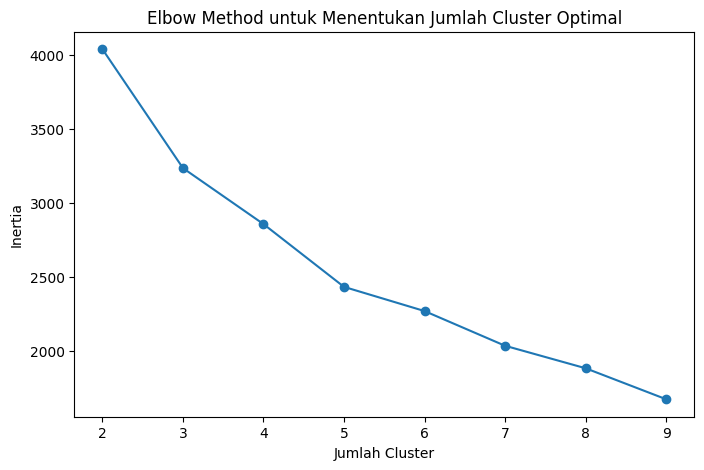

Optimal jumlah cluster (k) berdasarkan Elbow Method: 5


In [ ]:
# Evaluasi Elbow
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

optimal_k_elbow = k_values[np.argmin(np.diff(inertia, 2))]  # Menentukan elbow point
print(f"Optimal jumlah cluster (k) berdasarkan Elbow Method: {optimal_k_elbow}")

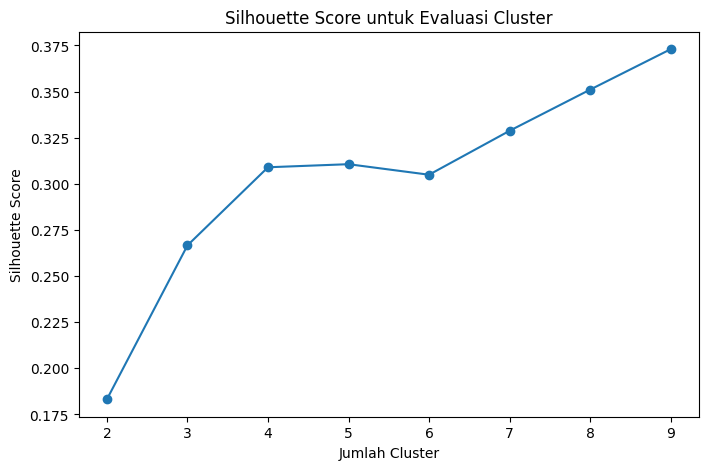

Optimal jumlah cluster (k) berdasarkan Silhouette Score: 9
Silhouette Score tertinggi: 0.37297946521951686


In [ ]:
# Evaluasi Silhouette Score

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.show()

# Mengecek Silhouette Score untuk berbagai metode clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal jumlah cluster (k) berdasarkan Silhouette Score: {optimal_k}")
print(f"Silhouette Score tertinggi: {optimal_silhouette_score}")

## **c. Feature Selection (Opsional)**

Feature selection yang digunakan dalam kode ini adalah SelectKBest dengan mutual_info_classif sebagai metode pemilihan fitur terbaik. Berikut penjelasan singkatnya:

1. SelectKBest (Feature Selection)

  * Tujuan: Memilih 6 fitur terbaik dari dataset berdasarkan hubungan dengan label (target).
  * Metode: Menggunakan mutual information classification, yaitu mengukur hubungan antara setiap fitur dengan target secara non-linear.
  * Hasil: Dataset baru dengan 6 fitur terpilih, yang digunakan untuk analisis lebih lanjut.

2. PCA (Dimensionality Reduction)
  * Tujuan: Mengurangi dimensi fitur terpilih menjadi 3 komponen utama, menjaga informasi utama dari data.
  * Manfaat: Mengurangi kompleksitas data dan meningkatkan efisiensi pemrosesan.

3. KMeans Clustering dengan PCA
  * Menguji jumlah cluster (k) dari 2 hingga 10, dengan mengevaluasi menggunakan Silhouette Score.
  * Memilih jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi.
  * Menjalankan KMeans dengan jumlah cluster terbaik dan menambahkan label cluster ke dataset.

In [ ]:
# SelectKBest dengan 6 fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=6)
X_selected = selector.fit_transform(df, labels_temp)
selected_features = df.columns[selector.get_support()]
df_selected = df[selected_features]

print(f"Fitur yang dipilih setelah SelectKBest: {list(selected_features)}")

Fitur yang dipilih setelah SelectKBest: ['TransactionDuration', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']


In [ ]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_selected)
print(f"Dimensi df_pca : {df_pca.shape}")

print(f"Total varians yang dijelaskan oleh PCA: {sum(pca.explained_variance_ratio_):.2f}")

Dimensi df_pca : (2399, 3)
Total varians yang dijelaskan oleh PCA: 0.95


In [ ]:
# Clustering dengan KMeans setelah PCA
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Tentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal jumlah cluster (k) setelah PCA: {optimal_k}")

# Latih ulang KMeans dengan jumlah cluster terbaik
kmeans_after = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
labels = kmeans_after.fit_predict(df_pca)

df['Cluster'] = labels

# Evaluasi Silhouette Score terbaik
silhouette_kmeans = silhouette_score(df_pca, labels)
print(f"Silhouette Score KMeans terbaik setelah PCA: {silhouette_kmeans}")

Optimal jumlah cluster (k) setelah PCA: 6
Silhouette Score KMeans terbaik setelah PCA: 0.9957366241335457


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Visualisasi PCA 3 Dimensi
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3'])

fig = px.scatter_3d(
    df_pca,
    x='PCA1', y='PCA2', z='PCA3',
    color=df['Cluster'].astype(str),  # Warna berdasarkan cluster
    title=f'Visualisasi Clustering KMeans dengan {optimal_k} Cluster (PCA 3D Projection)',
    labels={'color': 'Cluster'}
)

fig.show()

In [ ]:
# Visualisasi PCA dengan 3 dimensi disertai titik centroid
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3'])

centroids = kmeans_after.cluster_centers_

fig = px.scatter_3d(
    df_pca,
    x='PCA1', y='PCA2', z='PCA3',
    color=df['Cluster'].astype(str),  # Warna berdasarkan cluster
    title=f'Visualisasi Clustering KMeans dengan {optimal_k} Cluster (PCA 3D Projection)',
    labels={'color': 'Cluster'}
)

# Tambahkan centroid ke dalam plot
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name='Centroids'
))

fig.show()

In [ ]:
print(f"Dimensi df_pca: {df_pca.shape}")

Dimensi df_pca: (2399, 3)


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target
Melakukan Inverse Transform pada Data Target Setelah Clustering

Setelah melakukan clustering dengan model KMeans, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya.

In [ ]:
df_normalized = df.copy()

In [ ]:
df_normalized["Cluster"] = kmeans_after.labels_

In [ ]:
# Inverse transform nilai kategorikal
decoded_categorical = encoder.inverse_transform(df[encoder.get_feature_names_out()])
decoded_df = pd.DataFrame(decoded_categorical, columns=categorical_columns, index=df.index)
df_normalized = pd.concat([df.drop(columns=encoder.get_feature_names_out()), decoded_df], axis=1)

print("Dataset setelah inverse transform:")
print(df_normalized.head())

Dataset setelah inverse transform:
   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0           0.015317     0.838710             0.244828        0.336832   
1           0.416400     0.806452             0.451724        0.918055   
2           0.139579     0.016129             0.158621        0.068637   
3           0.204047     0.129032             0.051724        0.569198   
4           0.014608     0.129032             0.648276        0.492591   

   Cluster TransactionType Channel CustomerOccupation  
0        2           Debit     ATM             Doctor  
1        2           Debit     ATM             Doctor  
2        1           Debit  Online            Student  
3        1           Debit  Online            Student  
4        4          Credit  Online            Student  


### Inverse Data Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Inverse transform nilai numerik
df_normalized[numerical_features] = scaler.inverse_transform(df_normalized[numerical_features])

In [ ]:
# Mengatur urutan kolom agar cluster kmeans berada di akhir kolom (kanan)
columns_order = [col for col in df_normalized.columns if col != 'Cluster'] + ['Cluster']

df_normalized = df_normalized[columns_order]

In [ ]:
df_normalized.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType,Channel,CustomerOccupation,Cluster
0,14.09,70.0,81.0,5112.21,Debit,ATM,Doctor,2
1,376.24,68.0,141.0,13758.91,Debit,ATM,Doctor,2
2,126.29,19.0,56.0,1122.35,Debit,Online,Student,1
3,184.50,26.0,25.0,8569.06,Debit,Online,Student,1
4,13.45,26.0,198.0,7429.40,Credit,Online,Student,4


# Analisis karakteristik tiap cluster

In [ ]:
# Analisis kolom kategorikal berdasarkan modus (nilai terbanyak dalam cluster)
cluster_categorical_summary = df_normalized.groupby("Cluster")[['TransactionType', 'Channel', 'CustomerOccupation']].agg(lambda x: x.mode().iloc[0])

print(cluster_categorical_summary)

        TransactionType Channel CustomerOccupation
Cluster                                           
0                 Debit  Branch             Doctor
1                 Debit  Online           Engineer
2                 Debit     ATM             Doctor
3                Credit  Branch            Retired
4                Credit  Online            Retired
5                Credit     ATM            Student


In [ ]:
# Analisis rata-rata kolom numerik
cluster_summary = df_normalized.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

         TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
Cluster                                                                     
0               238.480304    43.829392           115.856419     5292.817669
1               255.681815    43.629630           119.966667     4883.642296
2               256.395403    45.191667           122.356944     5133.808722
3               286.736708    46.246914           114.753086     5029.695103
4               250.366695    46.562232           123.502146     5633.986738
5               287.973380    43.845070           122.197183     4637.230423


In [ ]:
cluster_summary = df_normalized.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max'],
    'CustomerAge': ['mean', 'median', 'min', 'max'],
    'TransactionDuration': ['mean', 'median', 'min', 'max'],
    'AccountBalance': ['mean', 'median', 'min', 'max'],
}).reset_index()

# Ratakan multi-index kolom agar bisa di-merge
cluster_summary.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in cluster_summary.columns]

# Tambahkan distribusi kategori dalam tiap cluster
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
cluster_categorical = df_normalized.groupby('Cluster')[categorical_features].agg(lambda x: x.mode()[0]).reset_index()

# Gabungkan hasil analisis numerik & kategorikal
cluster_analysis = pd.merge(cluster_summary, cluster_categorical, left_on="Cluster_", right_on="Cluster").drop(columns=["Cluster_"])

# Tampilkan hasil
print(cluster_analysis.head())

   TransactionAmount_mean  TransactionAmount_median  TransactionAmount_min  \
0              238.480304                    176.71                   0.45   
1              255.681815                    198.05                   0.26   
2              256.395403                    202.33                   0.32   
3              286.736708                    231.51                   3.30   
4              250.366695                    181.81                   3.42   

   TransactionAmount_max  CustomerAge_mean  CustomerAge_median  \
0                 886.19         43.829392                43.0   
1                 903.19         43.629630                42.0   
2                 880.04         45.191667                46.5   
3                 864.72         46.246914                49.0   
4                 890.24         46.562232                48.0   

   CustomerAge_min  CustomerAge_max  TransactionDuration_mean  \
0             18.0             80.0                115.856419   
1   

In [ ]:
# Statistik numerik per cluster
cluster_summary = df_normalized.groupby('Cluster').agg({
    'TransactionAmount': 'mean',
    'AccountBalance': 'mean',
    'TransactionDuration': 'mean',
    'CustomerAge': 'mean',
}).reset_index()

categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
cluster_categorical = df_normalized.groupby('Cluster')[categorical_features].agg(lambda x: x.mode()[0]).reset_index()

cluster_analysis = pd.merge(cluster_summary, cluster_categorical, on="Cluster")

# Menampilkan 5 baris pertama dari hasil analisis
cluster_analysis.head()

,Cluster,TransactionAmount,AccountBalance,TransactionDuration,CustomerAge,TransactionType,Channel,CustomerOccupation
0,0,238.480304,5292.817669,115.856419,43.829392,Debit,Branch,Doctor
1,1,255.681815,4883.642296,119.966667,43.629630,Debit,Online,Engineer
2,2,256.395403,5133.808722,122.356944,45.191667,Debit,ATM,Doctor
3,3,286.736708,5029.695103,114.753086,46.246914,Credit,Branch,Retired
4,4,250.366695,5633.986738,123.502146,46.562232,Credit,Online,Retired


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans, berdasarkan data transaksi yang melibatkan fitur seperti jenis transaksi, saluran transaksi, pekerjaan pelanggan, jumlah transaksi, saldo akun, durasi transaksi, dan usia pelanggan.

* Cluster 0
  - Rata-rata Transaction Amount  : 238.48
  - Rata-rata Account Balance     : 5292.82
  - Rata-rata Transaction Duration: 115.86
  - Rata-rata Customer Age        : 43.83

  - Dominan Kategori
    - Transaction Type              : Debit
    - Channel                       : Branch
    - Customer Occupation           : Doctor

  **Interpretasi:**<br>
  Pelanggan dokter menghabiskan waktu lebih lama dalam transaksi melalui cabang fisik, dengan rata-rata durasi 115.86, yang lebih lama dibandingkan dengan cluster lainnya.

* Cluster 1
  - Rata-rata Transaction Amount  : 255.68
  - Rata-rata Account Balance     : 4883.64
  - Rata-rata Transaction Duration: 119.97
  - Rata-rata Customer Age        : 43.63

  - Dominan Kategori
    - Transaction Type              : Debit
    - Channel                       : Online
    - Customer Occupation           : Engineer

  **Interpretasi:**<br>
  Pelanggan engineer menghabiskan waktu lebih lama dalam transaksi online, dengan rata-rata durasi 119.97, yang menunjukkan kecermatan lebih tinggi dalam transaksi mereka. <br>

* Cluster 2
  - Rata-rata Transaction Amount  : 256.40
  - Rata-rata Account Balance     : 5133.81
  - Rata-rata Transaction Duration: 122.36
  - Rata-rata Customer Age        : 45.19

  - Dominan Kategori
    - Transaction Type              : Debit
    - Channel                       : ATM
    - Customer Occupation           : Doctor

  **Interpretasi:**<br>
  Pelanggan dokter yang menggunakan ATM menghabiskan waktu lebih lama, dengan rata-rata durasi 122.36, menunjukkan bahwa transaksi di ATM memakan waktu lebih lama dibandingkan transaksi di cabang atau online.<br>

* Cluster 3
  - Rata-rata Transaction Amount  : 286.74
  - Rata-rata Account Balance     : 5029.70
  - Rata-rata Transaction Duration: 114.75
  - Rata-rata Customer Age        : 46.25

  - Dominan Kategori
    - Transaction Type              : Credit
    - Channel                       : Branch
    - Customer Occupation           : Retired

  **Interpretasi:**<br>
  Pensiunan yang melakukan transaksi kredit di cabang fisik memiliki rata-rata durasi transaksi 114.75, yang merupakan durasi transaksi lebih lama dibandingkan beberapa cluster lainnya.<br>

* Cluster 4
  - Rata-rata Transaction Amount  : 250.37
  - Rata-rata Account Balance     : 5633.99
  - Rata-rata Transaction Duration: 123.50
  - Rata-rata Customer Age        : 46.56

  - Dominan Kategori
    - Transaction Type              : Credit
    - Channel                       : Online
    - Customer Occupation           : Retired

  **Interpretasi:**<br>
  Pensiunan yang melakukan transaksi kredit secara online menghabiskan waktu lebih lama, dengan rata-rata durasi 123.50, yang menunjukkan bahwa transaksi online yag dilakukan pensiunan membutuhkan waktu lebih lama dibandingkan transaksi di cabang fisik.<br>

* Cluster 5
  - Rata-rata Transaction Amount  : 287.97
  - Rata-rata Account Balance     : 4637.23
  - Rata-rata Transaction Duration: 122.20
  - Rata-rata Customer Age        : 43.85

  - Dominan Kategori
    - Transaction Type              : Credit
    - Channel                       : ATM
    - Customer Occupation           : Student

  **Interpretasi:**<br>
  Mahasiswa yang melakukan transaksi kredit di ATM menghabiskan waktu lebih lama, dengan rata-rata durasi 122.20, hal ini mendukung juga untuk kemungkinan bahwa transaksi di ATM memerlukan waktu lebih lama dibandingkan transaksi lainnya.<br>
  <br>

* ** Jika dikatikan dengan Wawasan Bisnis dan Indikasi Potensi Fraud**<br>
Pola Transaksi yang Tiba-tiba Berubah (Potensi Anomali dan Fraud):<br>
Pola transaksi yang tiba-tiba berubah, seperti peningkatan mendadak dalam jumlah transaksi atau saldo, bisa menjadi indikasi anomali yang perlu dianalisis lebih lanjut. Misalnya, jika seorang pelanggan yang biasanya bertransaksi dalam jumlah kecil tiba-tiba melakukan transaksi besar atau mengubah pola transaksi mereka secara signifikan, ini bisa menjadi tanda adanya aktivitas yang mencurigakan. Oleh karena itu, penting untuk menggunakan alat analisis dan pemantauan untuk mendeteksi pola yang tidak biasa yang mungkin terkait dengan upaya penipuan. Jika ditemukan, hal ini memerlukan penyelidikan lebih lanjut untuk memastikan keamanan dan integritas akun nasabah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Tentukan nama file dan path penyimpanan
file_name = "Dataset_inisiasi.csv"  # Ganti dengan nama yang diinginkan
output_path = f"/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/{file_name}"

# Simpan DataFrame ke dalam file CSV di Google Drive
df_normalized.to_csv(output_path, index=False)

print(f"Hasil clustering telah disimpan di Google Drive sebagai: {output_path}")

Hasil clustering telah disimpan di Google Drive sebagai: /content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_inisiasi.csv
